In [42]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
train_df = pd.read_csv('../data/train_engineered_1.csv')
test_df = pd.read_csv('../data/test_engineered_1.csv')

Encode Sex and Embarked in both datasets

In [29]:
for df in [train_df, test_df]:
    df['Sex_encoded'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked_encoded'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [37]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,IsAlone,WomanOrChild,IsRich,IsFirstClass,CabinKnown,AgeGroup,AgeGroup_encoded,Sex_encoded,Embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,2,0,0,0,0,0,Young Adult,2,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,2,0,1,1,1,1,Adult,3,1,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,1,0,0,0,Young Adult,2,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,2,0,1,1,1,1,Adult,3,1,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,1,0,0,0,0,Adult,3,0,0.0


In [31]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,FamilySize,IsAlone,WomanOrChild,IsRich,IsFirstClass,CabinKnown,AgeGroup,AgeGroup_encoded,Sex_encoded,Embarked_encoded
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,1,0,0,0,0,Adult,3,0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,2,0,1,0,0,0,Middle-aged,4,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,1,1,0,0,0,0,Senior,5,0,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,1,0,0,0,0,Young Adult,2,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,3,0,1,0,0,0,Young Adult,2,1,0


In [35]:
features = ['Pclass', 'FamilySize', 'IsAlone','WomanOrChild', 'IsRich', 'IsFirstClass', 'CabinKnown', 'Sex_encoded', 'AgeGroup_encoded','Embarked_encoded']

Handle missing values

In [ ]:
train_df = train_df.dropna(subset=features + ['Survived'])
test_df = test_df.fillna(test_df.mean(numeric_only=True))

Prepare data for training

In [38]:
X = train_df[features]
y = train_df['Survived']

In [39]:
# Split: 80% train, 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

Training

In [40]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Predict on validation set

In [41]:
y_pred = model.predict(X_val)

In [43]:
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.8258426966292135

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       110
           1       0.78      0.75      0.77        68

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.83      0.83       178



Accuracy = 82.6% is good for the first model

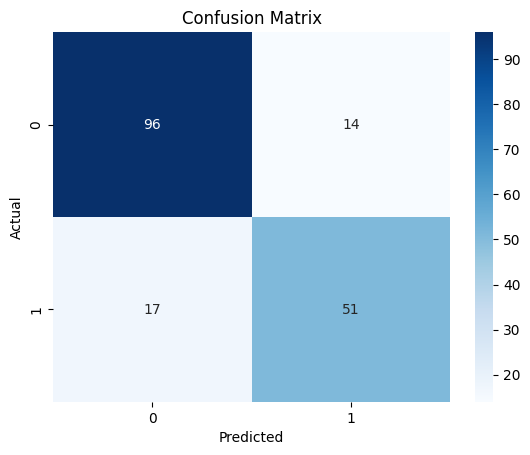

In [44]:
matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* True Negatives (TN): 96 passengers correctly predicted not survived
* True Positives (TP): 51 passengers correctly predicted survived
* False Negatives (FN): 17 survivors were missed 😢
* False Positives (FP): 14 were predicted to survive but didn’t

Predicting on test set

In [45]:
X_test = test_df[features]
test_df['Survived'] = model.predict(X_test)

In [46]:
submission = test_df[['PassengerId', 'Survived']]
submission.to_csv('../data/logistic_regression_submission.csv', index=False)